In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Permasalahan : Menrumuskan strategi untuk meningkatkan penjualan produk

## Tujuan EDA :
### Mencari faktor-faktor yang mempengaruhi tingkat penjualan produk

In [234]:
df = pd.read_csv("ecommerce.csv",index_col=0)

df.head()

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men


### Mencoba untuk melihat korelasi antara besar diskon yang diberikan dan jenis pengiriman barang terhadap jumlah unit terjual

In [235]:
# mencari data null
df.isna().sum()

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

Kolom rating memiliki 182 null values, karena kolom rating tidak digunakan dalam EDA kali ini, maka kolom rating akan di drop

In [236]:
#drop kolom rating

df = df.drop(['rating'],axis=1)
df.head()

,category,product,Original_price,price,perc_of_unit_sold,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,Eligible for FREE Shipping,men


category = kategori produk,
product = nama produk,
original_price = harga asli sebelum diskon,
price = harga setelah diskon,
perc_of_unit_sold = asumsi presentase jumlah produk yang terjual per 100 produk,
shpping_rate = jenis shipping,
gender = gender yang menjadi target produk,
discount_prc = presentase diskon,

In [237]:
dropindex = df[(df.gender.isna()) | (df.perc_of_unit_sold.isna()) | (df.Original_price.isna()) | (df.shpping_rate.isna())].index
dropindex.shape

(137,)

Terdapat 137 row yang memiliki null values pada kolom yang akan digunakan dalam EDA, dikarenakan data kolom tersebut merupakan kolom target EDA sehingga 137 row tersebut akan di drop

In [238]:
df = df.drop(dropindex,axis=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

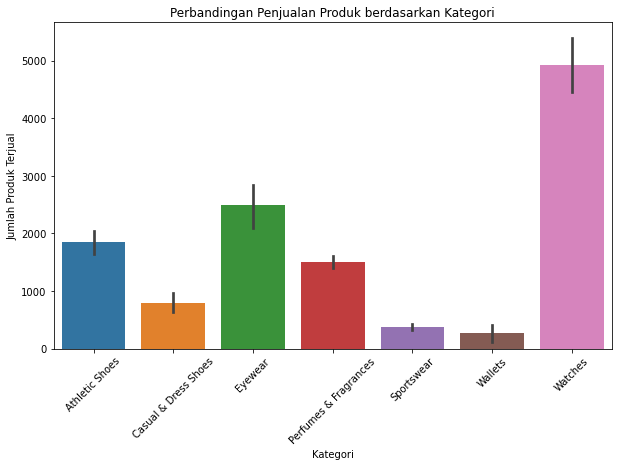

In [239]:
plt.figure(figsize=(10,6))
plt.title('Perbandingan Penjualan Produk berdasarkan Kategori')
sns.barplot(df.category,df.perc_of_unit_sold,estimator=sum)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(rotation=45)

Gambaran umum : Produk kategori watches dan eyewear memiliki tingkat penjualan yang tinggi , sedangkan sportswear dan wallets memiliki tingkat penjualan yang rendah

### Pengaruh besar diskon dengan presentase penjualan

In [240]:
# def con(x):
#     if 75 < x <= 100:
#         return "75-100"
#     elif 50 < x <= 75:
#         return "50-75"
#     elif 25 < x <= 50:
#         return "25-50"
#     else:
#         return "under 25"
    
# df['discount_cat'] = df['discount_prc'].apply(lambda x: con(x))

df['discount_prc'] = round((1-(df['price']/df['Original_price']))*100,2)
df['gap'] = df['Original_price'] - df['price']
df.sort_values('discount_prc',ascending=0).head()

,category,product,Original_price,price,perc_of_unit_sold,shpping_rate,gender,discount_prc,gap
151,Watches,Akribos XXIV Men's Black Dial Stainless Steel ...,2240.0,139.48,80.0,Eligible for FREE Shipping,men,93.77,2100.52
153,Watches,August Steiner Men's Gun/White Dial Metal Band...,1670.0,199.49,77.0,Eligible for FREE Shipping,men,88.05,1470.51
55,Watches,JBW Alessandra for Women - Analog Stainless St...,5481.0,679.49,41.0,FREE Shipping,women,87.60,4801.51
58,Watches,Akribos XXIV Swiss Quartz Chronograph Strap Me...,1970.0,249.00,95.0,FREE Shipping,men,87.36,1721.00
78,Watches,JBW Victory Women's 16 Diamonds Mother of Pear...,5870.0,753.98,79.0,FREE Shipping,women,87.16,5116.02


Text(0, 0.5, 'Presentase Produk Terjual')

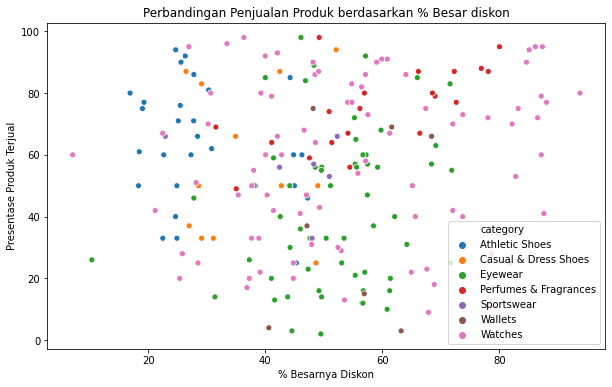

In [241]:
plt.figure(figsize=(10,6))
plt.title('Perbandingan Penjualan Produk berdasarkan % Besar diskon')
sns.scatterplot(df.discount_prc,df.perc_of_unit_sold,hue=df.category)
plt.xlabel('% Besarnya Diskon')
plt.ylabel('Presentase Produk Terjual')

Jika dilihat dari grafik diatas, tidak ada korelasi antara besarnya diskon yang diberikan dengan presentase penjualan

In [242]:
df.corr()

,Original_price,price,perc_of_unit_sold,discount_prc,gap
Original_price,1.000000,0.680254,-0.038346,0.512197,0.973547
price,0.680254,1.000000,-0.228193,-0.024817,0.494784
perc_of_unit_sold,-0.038346,-0.228193,1.000000,0.085791,0.025671
discount_prc,0.512197,-0.024817,0.085791,1.000000,0.614996
gap,0.973547,0.494784,0.025671,0.614996,1.000000


Jika dilihat pada tabel corr, nilai corr untuk "% besar diskon" adalah 0.085, yang berarti pengaruhnya terhadap presentase produk terjual tidak kuat.

In [243]:
df.groupby('category').sum().sort_values('perc_of_unit_sold',ascending=0)

,Original_price,price,perc_of_unit_sold,discount_prc,gap
category,,,,,
Watches,135127.4,47341.44,4924.0,4643.08,87785.96
Eyewear,49166.5,23354.12,2486.0,3067.96,25812.38
Athletic Shoes,11478.0,8045.19,1850.0,880.99,3432.81
Perfumes & Fragrances,4594.0,1722.23,1502.0,1178.68,2871.77
Casual & Dress Shoes,6152.0,3955.29,795.0,498.89,2196.71
Sportswear,990.0,583.89,381.0,303.07,406.11
Wallets,1598.0,656.46,269.0,386.11,941.54


Kategori yang memiliki penjualan terbanyak adalah Watches dan Eyewear

### Pengaruh Shipping

In [244]:
ship = df.groupby('shpping_rate')
ship.sum()

,Original_price,price,perc_of_unit_sold,discount_prc,gap
shpping_rate,,,,,
Eligible for FREE Shipping,19387.0,7645.47,4219.0,3354.44,11741.53
FREE Shipping,189718.9,78013.15,7988.0,7604.34,111705.75


Jika dilihat dari tabel berikut, Free shipping memiliki tingkat penjualan produk yang lebih tinggi dibandingkan dengan eligible for free shipping

Text(0, 0.5, 'Jumlah produk terjual')

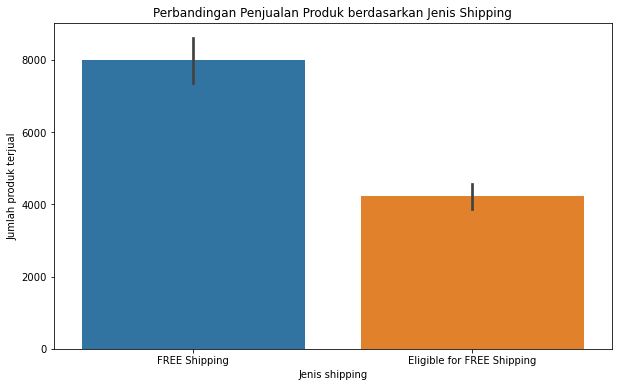

In [245]:
x = [i for i,df in ship]


plt.figure(figsize=(10,6))
plt.title('Perbandingan Penjualan Produk berdasarkan Jenis Shipping')
sns.barplot(df.shpping_rate, df.perc_of_unit_sold,estimator=sum)
plt.xlabel('Jenis shipping')
plt.ylabel('Jumlah produk terjual')

Pembelian produk disertai free shipping, memiliki tingkat penjualan yang lebih tinggi

### Watches dan Eyewear

In [246]:
watches = df[df.category == 'Watches']
watches['gap'].mean(),watches['discount_prc'].mean()

(1032.7759999999998, 54.624470588235326)

Produk kategori eyewear memilki rata2 diskon sebesar 51.9% dengan rata2 selisih harga sebesar 437

In [247]:
eye = df[df.category == 'Eyewear']
eye['gap'].mean(),eye['discount_prc'].mean()

(437.49796610169483, 51.999322033898316)

Produk kategori eyewear memilki rata2 diskon sebesar 51.9% dengan rata2 selisih harga sebesar 437

### Wallet dan Sportswear

In [248]:
wallet = df[df.category == 'Wallets']
wallet['gap'].mean(),wallet['discount_prc'].mean()

(134.50571428571428, 55.15857142857143)

Kategori wallet memiliki rata2 diskon sebesar 55.1% dengan rata2 selisih harga sebesar 134

In [249]:
spt = df[df.category == 'Sportswear']
spt['gap'].mean(),spt['discount_prc'].mean()

(58.01571428571428, 43.295714285714276)

Kategori Sportswear memiliki rata2 diskon sebesar 43.2% dengan rata2 selisih harga sebesar 58

Text(0, 0.5, 'Jumlah produk terjual')

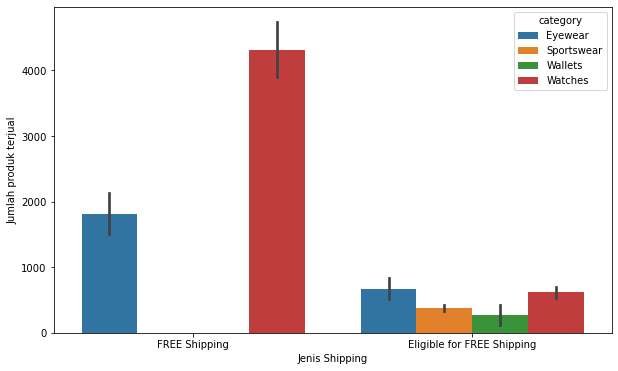

In [250]:
mix = df[df.category.str.contains("Watches|Eyewear|Sportswear|Wallets")]

plt.figure(figsize=(10,6))
sns.barplot(mix.shpping_rate, mix.perc_of_unit_sold, hue=mix.category,estimator=sum)
plt.xlabel('Jenis Shipping')
plt.ylabel('Jumlah produk terjual')

In [251]:
mix.groupby(['category','shpping_rate']).mean()

Original_price       price  \
category   shpping_rate                                             
Eyewear    Eligible for FREE Shipping      300.000000  139.525833   
           FREE Shipping                   969.500000  461.272553   
Sportswear Eligible for FREE Shipping      141.428571   83.412857   
Wallets    Eligible for FREE Shipping      228.285714   93.780000   
Watches    Eligible for FREE Shipping      707.500000  142.336250   
           FREE Shipping                  1681.394805  600.035714   

                                       perc_of_unit_sold  discount_prc  \
category   shpping_rate                                                  
Eyewear    Eligible for FREE Shipping          56.250000     50.922500   
           FREE Shipping                       38.531915     52.274255   
Sportswear Eligible for FREE Shipping          54.428571     43.295714   
Wallets    Eligible for FREE Shipping          38.428571     55.158571   
Watches    Eligible for FREE Shipping          77.125000     59.317500   
           FREE Shipping                       55.935065     54.136883   

                                               gap  
category   shpping_rate                             
Eyewear    Eligible for FREE Shipping   160.474167  
           FREE Shipping                508.227447  
Sportswear Eligible for FREE Shipping    58.015714  
Wallets    Eligible for FREE Shipping   134.505714  
Watches    Eligible for FREE Shipping   565.163750  
           FREE Shipping               1081.359091

Berdasarkan grafik dan tabel diatas, terlihat bahwa Watches dan Eyewear memilki sales yang tinggi apabila disertai dengan Free Shipping

## Insight

##### 1. Besarnya % diskon tidak mempengaruhi jumlah produk yang terjual
##### 2. Produk yang dijual disertai Free Shipping memilki tingkat  penjualan yang lebih tinggi 
##### 3. Produk berkategori Watches dan Eyewear dengan Free Shipping, memiliki tingkat penjualan yang tinggi dikarenakan kategori tersebut memiliki rata2 nominal potongan harga terbesar yaitu 1081 dan 508, hampir 2 kali dibandingkan dengan  eligible for free shipping
##### 4. Wallets dan Sportswear memiliki tingkat penjualan yang rendah, dengan rata2 nominal potongan harga 134 dan 58. Kategori ini juga tidak memiliki penjualan yang disertai free shipping

## Saran dan Kesimpulan

#### Konsumen lebih tertarik untuk membeli produk yang disertai layanan Free Shipping, sehingga untuk menaikkan rate penjualan disarankan untuk menambah layanan free shipping dalam pembelian produk. Karena eligible for free shipping berarti konsumen harus membeli produk dengan nominal tertentu untuk mendapatkan layanan free shipping

#### Konsumen lebih tertarik dengan nominal selisih harga dibanding besarnya presentase diskon yang diberikan. Sehingga nilai % diskon pada barang dengan harga yang tinggi meskipun angka % tidak besar, lebih disukai konsumen dibandingkan nilai % diskon yang besar pada barang dengan harga rendah